## White Wines KNN

In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

white_wines = pd.read_csv("winequality-white.csv", sep=";")
white_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
white_wines['target'] = np.where(white_wines['quality']<=5,0,1)

Based on a feature importance Diane did on a random forest, Alcohol, volatile acidity, sulphates, density and total sulfur dioxide came in for top 5 features. Looking at boxplot below, total sulfur dioxide has the widest range of of outliers.

In [4]:
# Assign X & y

X = white_wines.drop(["quality", 'target'], axis=1)
y= white_wines.target

In [5]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [6]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Train the Model

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_scaled, y_train)

predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[1 1 1 ... 1 1 1]
[0 1]


In [8]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8803967327887982
Testing Data Score: 0.7612244897959184


In [9]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[294 179]
 [172 825]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       473
           1       0.82      0.83      0.82       997

    accuracy                           0.76      1470
   macro avg       0.73      0.72      0.73      1470
weighted avg       0.76      0.76      0.76      1470



## Hyper Parameter Tuning


k: 1, Train/Test Score: 1.000/0.776
k: 3, Train/Test Score: 0.880/0.761
k: 5, Train/Test Score: 0.842/0.770
k: 7, Train/Test Score: 0.823/0.771
k: 9, Train/Test Score: 0.811/0.769
k: 11, Train/Test Score: 0.802/0.771
k: 13, Train/Test Score: 0.796/0.773
k: 15, Train/Test Score: 0.796/0.771
k: 17, Train/Test Score: 0.793/0.772
k: 19, Train/Test Score: 0.788/0.773


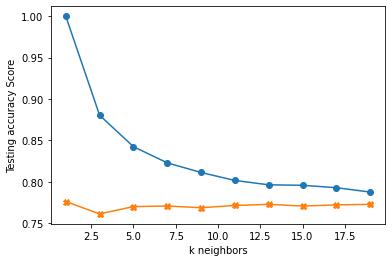

In [10]:
# below code from Linkedin Learning esercise

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="X")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show();

### further tuning

In [12]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,9))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


## Calculating Feature Importance

In [13]:
# calucalting feature importance
# https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [14]:
Features = white_wines.drop(['quality', 'target'], axis =1)

Best alpha using built-in LassoCV: 0.001588
Best score using built-in LassoCV: -19.431571
Lasso picked 11 variables and eliminated the other 0 variables


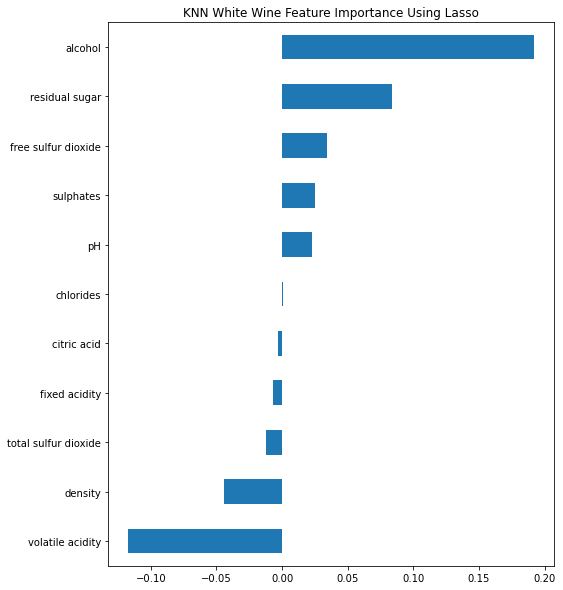

In [15]:
reg = LassoCV()
reg.fit(X_train_scaled, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = Features.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("KNN White Wine Feature Importance Using Lasso")
plt.savefig('KNN_White_Lasso')
plt.show()

Based on tuning and feature importance, running one last time with all and with best params.

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1

In [23]:
classifier3 = KNeighborsClassifier(n_neighbors = 1, leaf_size = 1, p = 1)
classifier3.fit(X_train_scaled, y_train)

predictions3 = classifier3.predict(X_test_scaled)
print(predictions3)
print(classifier3.classes_)

[1 1 1 ... 0 1 1]
[0 1]


In [31]:
print(f"Training Data Score: {classifier3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier3.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.791156462585034


In [25]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       473
           1       0.85      0.83      0.84       997

    accuracy                           0.79      1470
   macro avg       0.76      0.77      0.76      1470
weighted avg       0.79      0.79      0.79      1470



In [26]:
import joblib


In [29]:
filename = 'KNN_White.sav'
joblib.dump(classifier3, filename)

['KNN_White.sav']

In [30]:
loaded_model= joblib.load(filename)

result=loaded_model.score(X_test_scaled, y_test)

print(result)

0.791156462585034
